
# **ESRGAN for increasing resolution**
#### **This version fixes "unrecognized arguments" error**
#* * *
####**-SEEMS TO ONLY WORK CONSISTENTLY ON CHROME!!**
#### **-DOUBLE CHECK YOUR RUNTIME TYPE IS SET TO GPU**
example: an image with height 500px by width 500px scaled to an image with height 1762px by width 1762px

**You might need to go to Runtime>Restart Runtime**

If you open the folder icon (in the left menu) you will see all your files, the good thing about doing **Runtime>Restart Runtime** is that it keeps all the files you downloaded but Restarts the Memory on the Cloud Computer so you can put the ESRGAN model in memory, compared to **Runtime>Factory Reset Runtime** which Restarts the whole Cloud Computer to a default clear state.


In [ ]:
#@markdown # **1) Download required Libraries**
# # Clone Real-ESRGAN and enter the Real-ESRGAN
!git clone https://github.com/xinntao/Real-ESRGAN.git
%cd Real-ESRGAN
# Set up the environment
!pip install basicsr
!pip install facexlib
!pip install gfpgan
!pip install -r requirements.txt
!python setup.py develop
# Download the pre-trained model
!wget https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth -P experiments/pretrained_models
%cd ..

Cloning into 'Real-ESRGAN'...
remote: Enumerating objects: 682, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 682 (delta 4), reused 11 (delta 1), pack-reused 665
Receiving objects: 100% (682/682), 5.03 MiB | 19.15 MiB/s, done.
Resolving deltas: 100% (359/359), done.
/content/Real-ESRGAN
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 161 kB 7.2 MB/s 
     |████████████████████████████████| 5.8 MB 29.6 MB/s 
     |████████████████████████████████| 190 kB 53.8 MB/s 
  Created wheel for basicsr: filename=basicsr-1.3.5-py3-none-any.whl size=194483 sha256=e472a4cd4b018b9cdd7ea11bf5ca1d3fc06ddb6dd4d1490ce3dacc1c1ac1e452
  Stored in directory: /root/.cache/pip/wheels/74/1b/d0/8659cf028233dd1e3bf282271009fbf037dfc4ab761f32a032
Successfully built basicsr
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
running develop
running egg_info
creating realesrgan.egg-info
writing realesrgan.egg-info/PKG-INFO
writing dependency_links to realesrgan.egg-info/dependency_links.txt
writing requirements to realesrgan.egg-info/requires.txt
writing top-level names to realesrgan.egg-info/top_level.txt
writing manifest file 'realesrgan.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
adding license file 'LICENSE'
writing manifest file 'realesrgan.egg-info/SOURCES.txt'
running build_ext
Creating /usr/local/lib/python3.7/dist-packages/realesrgan.egg-link (link to .)
Adding realesrgan 0.2.5.0 to easy-install.pth file

Installed /content/Real-ESRGAN
Processing dependencies for realesrgan==0.2.5.0
Searching for tqdm==4.64.0
Best match: tqdm 4.64.0
Adding tqdm 4.64.0 to easy-install.pth file
Installing tqdm script to /usr/local/bin

Using /usr/local/lib/python3.7/dist-packages
Searching for torchvis

In [ ]:
#@markdown # **2) Run this block and Upload image using the DIALOG box! Wait till it loads the image and once it's done run the next block**
#@markdown You can drag and drop into choose files button
%cd Real-ESRGAN
import os
from google.colab import files
import shutil

upload_folder = 'upload'
result_folder = 'results'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
if os.path.isdir(result_folder):
    shutil.rmtree(result_folder)
os.mkdir(upload_folder)
os.mkdir(result_folder)

# upload images
uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)
%cd ..

/content/Real-ESRGAN


Saving Harlan & Benoit.jpeg to Harlan & Benoit.jpeg
move Harlan & Benoit.jpeg to upload/Harlan & Benoit.jpeg
/content


In [ ]:
#@markdown # **3) Run ERSGAN on Uploaded Image**
%cd Real-ESRGAN
!python inference_realesrgan.py -n RealESRGAN_x4plus -i upload --outscale 4 --face_enhance
# !python inference_realesrgan.py --model_path experiments/pretrained_models/RealESRGAN_x4plus.pth --input upload --netscale 4 --outscale 3.5 --half --face_enhance
%cd ..

/content/Real-ESRGAN
Downloading: "https://github.com/xinntao/facexlib/releases/download/v0.1.0/detection_Resnet50_Final.pth" to /usr/local/lib/python3.7/dist-packages/facexlib/weights/detection_Resnet50_Final.pth

100% 104M/104M [00:00<00:00, 205MB/s] 
Downloading: "https://github.com/xinntao/facexlib/releases/download/v0.2.2/parsing_parsenet.pth" to /usr/local/lib/python3.7/dist-packages/facexlib/weights/parsing_parsenet.pth

100% 81.4M/81.4M [00:00<00:00, 184MB/s]
Downloading: "https://github.com/TencentARC/GFPGAN/releases/download/v1.3.0/GFPGANv1.3.pth" to /usr/local/lib/python3.7/dist-packages/gfpgan/weights/GFPGANv1.3.pth

100% 332M/332M [00:01<00:00, 202MB/s]
Testing 0 Harlan & Benoit
/content


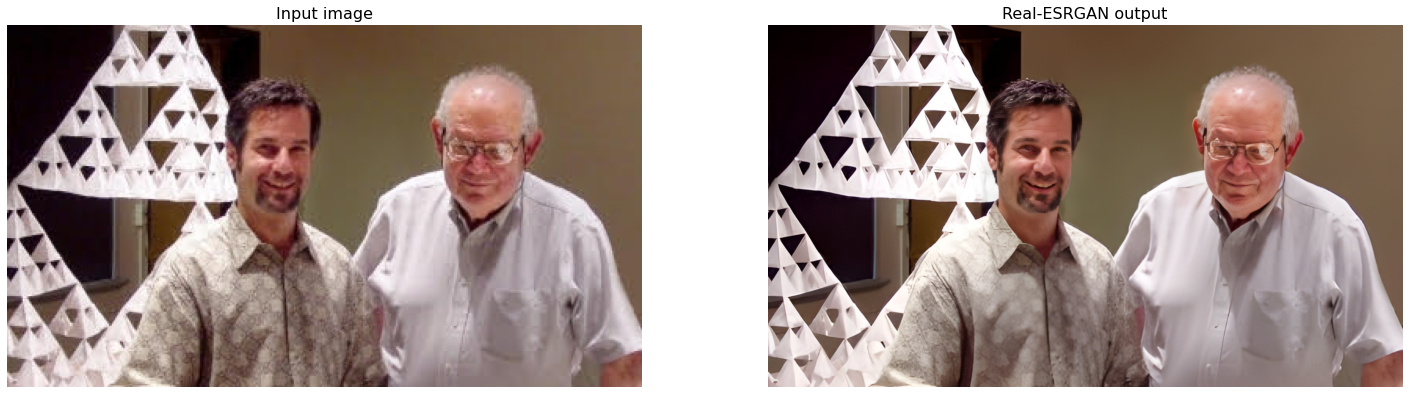

In [ ]:
#@markdown # **4) Compare before ESRGAN and after ESRGAN image** (Optional. You can skip this block if you want to)
# utils for visualization
import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('Real-ESRGAN output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# display each image in the upload folder
import os
import glob

input_folder = 'Real-ESRGAN/upload'
result_folder = 'Real-ESRGAN/results'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)

In [ ]:
#@markdown # **5) Download Super Enhanced Image**

from google.colab import files

filename= os.listdir('/content/Real-ESRGAN/results')
files.download('/content/Real-ESRGAN/results/'+filename[0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>